linear regression (logistic regression), support vector machines, decision trees and multi- layer perceptron neural network.

Apply K-fold cross validation (K is determined by yourselves) to evaluate each method and compare their performances.

You may use classification accuracy as the evaluation metric for classification, and mean squared error (MSE) for regression.

### EDA

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

path = './data/mushroom/agaricus-lepiota.data'
colnames=['class','cap-shape','cap-surface','cap-color','bruises','odor','grill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'] 
df1 = pd.read_csv(path, sep=",", names=colnames)

class
e    4208
p    3916
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution'}, xlabel='class', ylabel='count'>

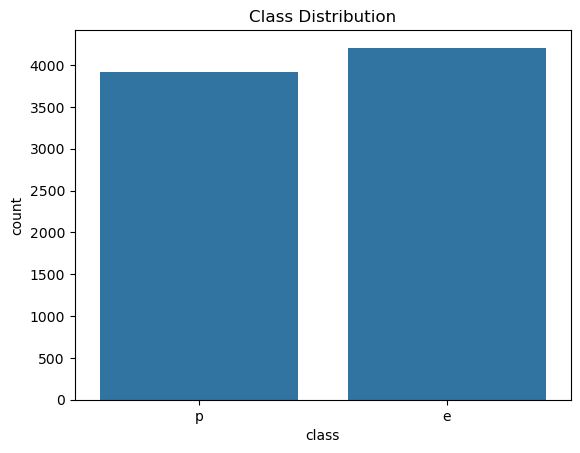

In [59]:
print(df1['class'].value_counts())
plt.title("Class Distribution")
sns.countplot(x="class", data=df1)

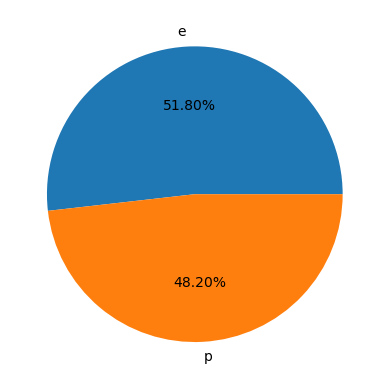

In [60]:
ratio = pd.DataFrame(df1['class'].value_counts()/df1['class'].count())
ratio.reset_index(inplace=True)
plt.pie(x=list(ratio['count']),labels=list(ratio['class']),autopct='%.2f%%')
plt.show()

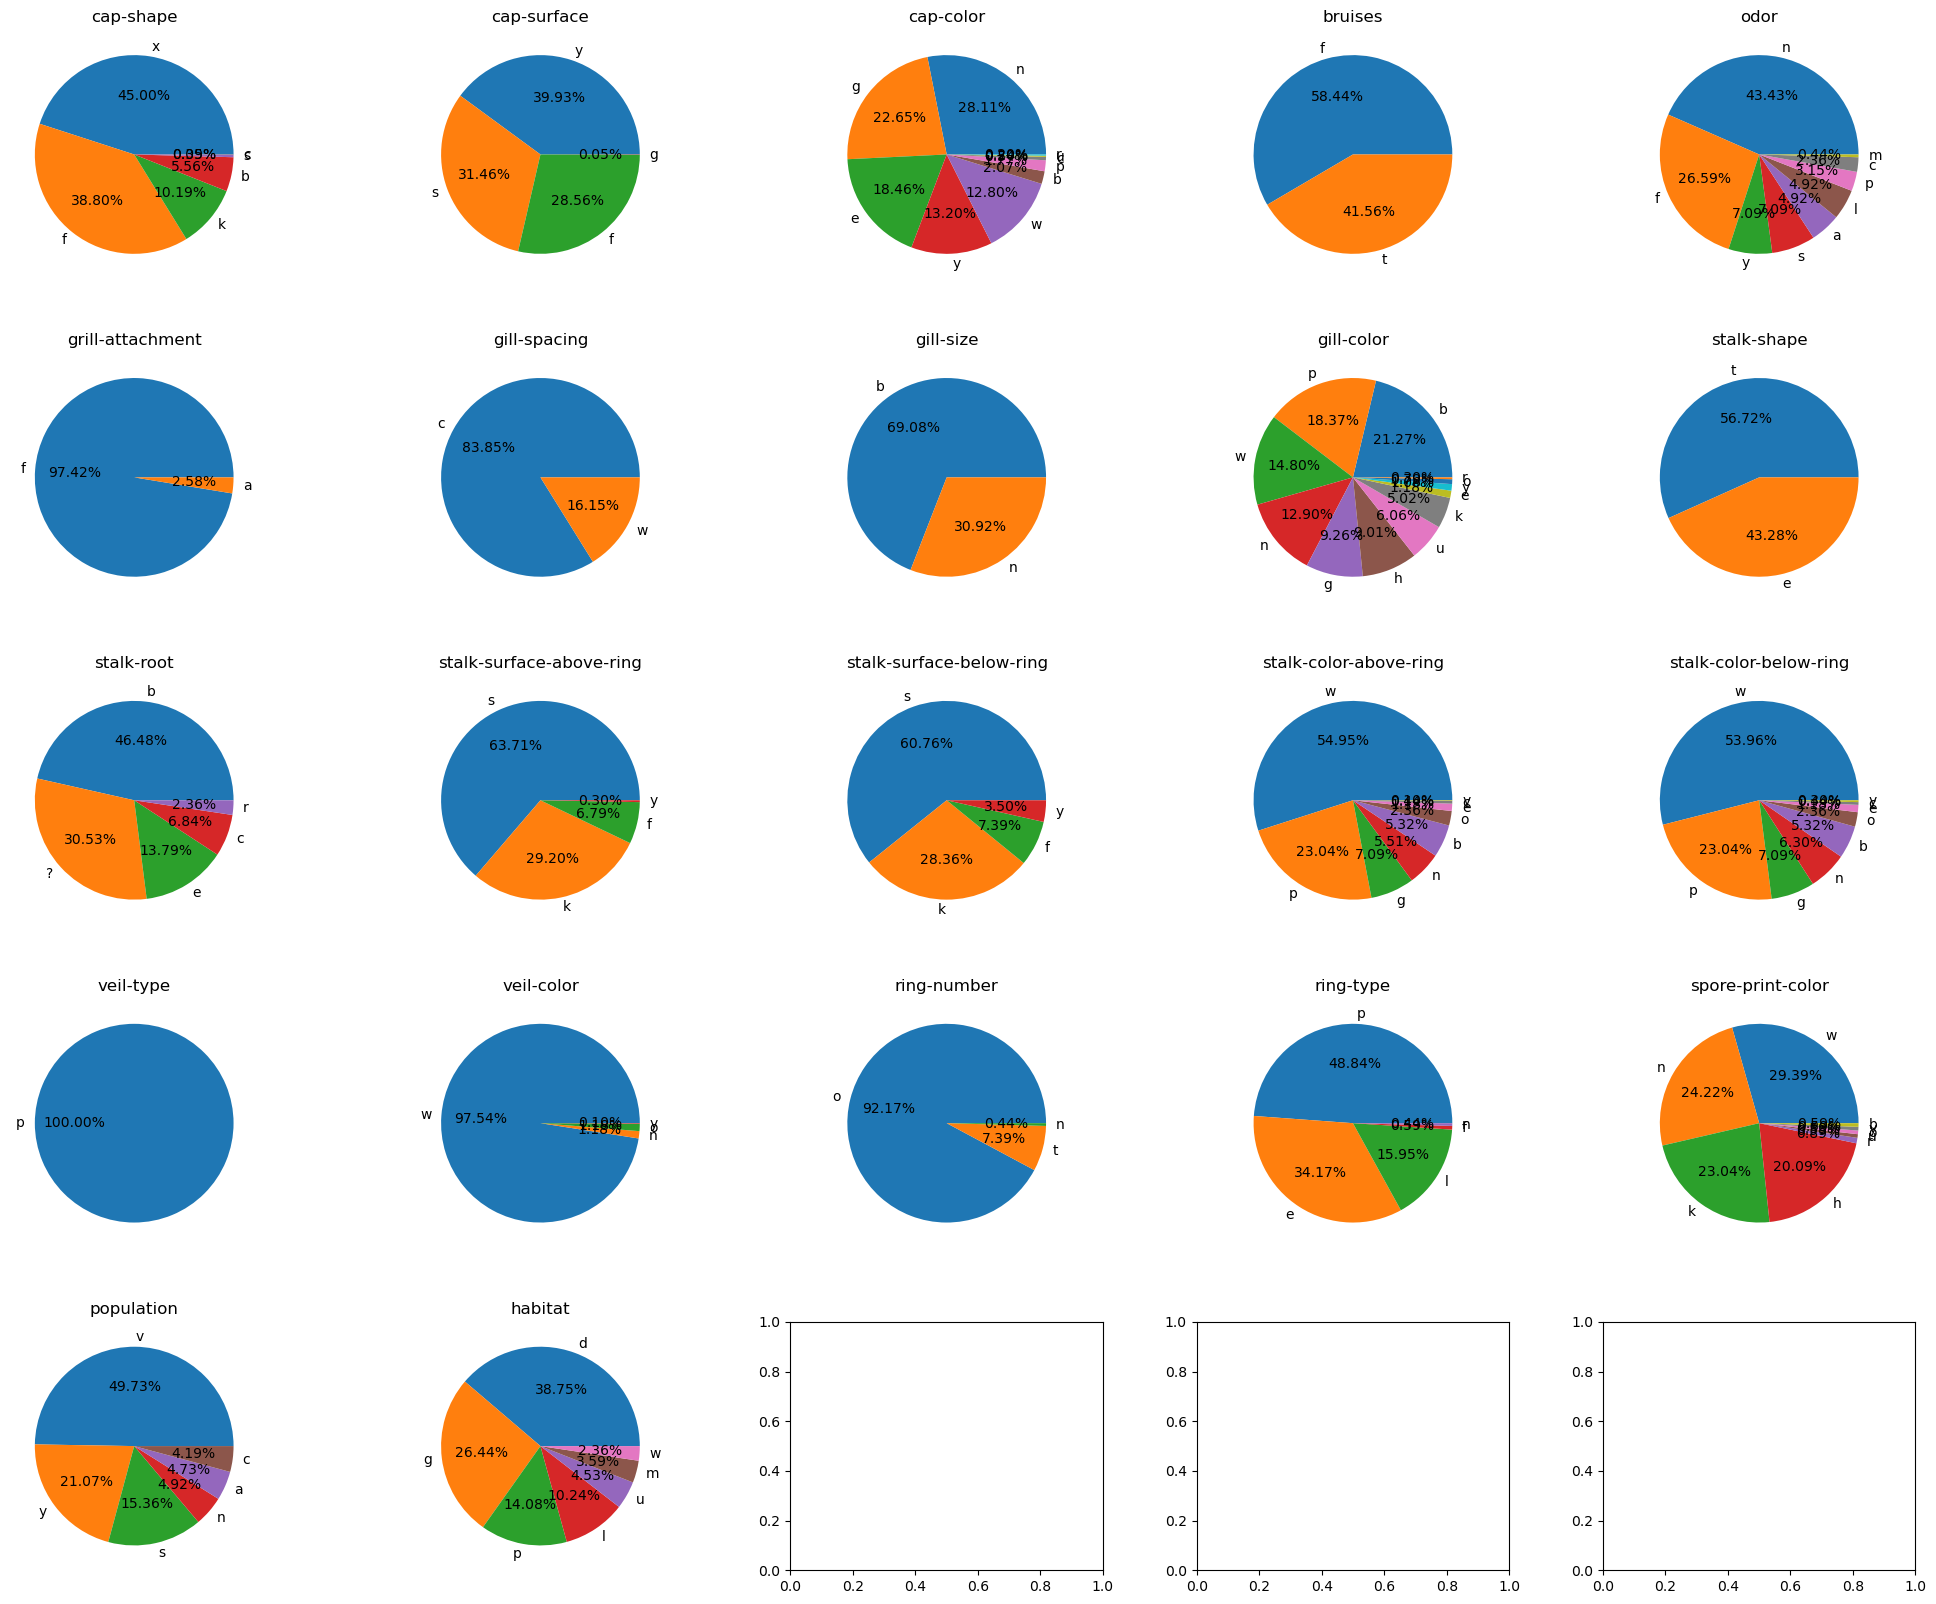

In [61]:
f, ax = plt.subplots(5, 5)

f.set_size_inches((25, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

num_rows = 4
num_cols = 5

for i, idx in enumerate(df1.columns[1:]): #categorical_features = df1.select_dtypes(include=['object']).columns
    # print(i,idx)
    row = i // num_cols
    col = i % num_cols
    new = pd.DataFrame(df1[idx].value_counts()/df1[idx].count())
    new.reset_index(inplace=True)
    
    ax[row,col].set_title(idx)
    ax[row,col].set_ylabel('')
    ax[row,col].pie(x=list(new['count']),labels=list(new[idx]),autopct='%.2f%%')

<Axes: title={'center': 'Class Distribution'}, xlabel='veil-color', ylabel='count'>

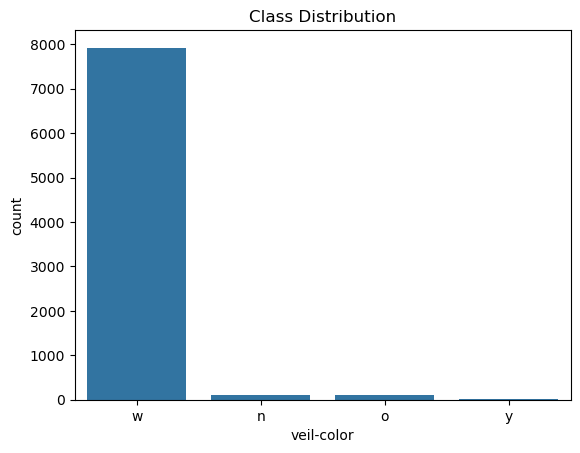

In [252]:
plt.title("Class Distribution")
sns.countplot(x="veil-color", data=df1)

In [138]:
categorical_features = df1.select_dtypes(include=['object']).columns
categorical_features

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'grill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

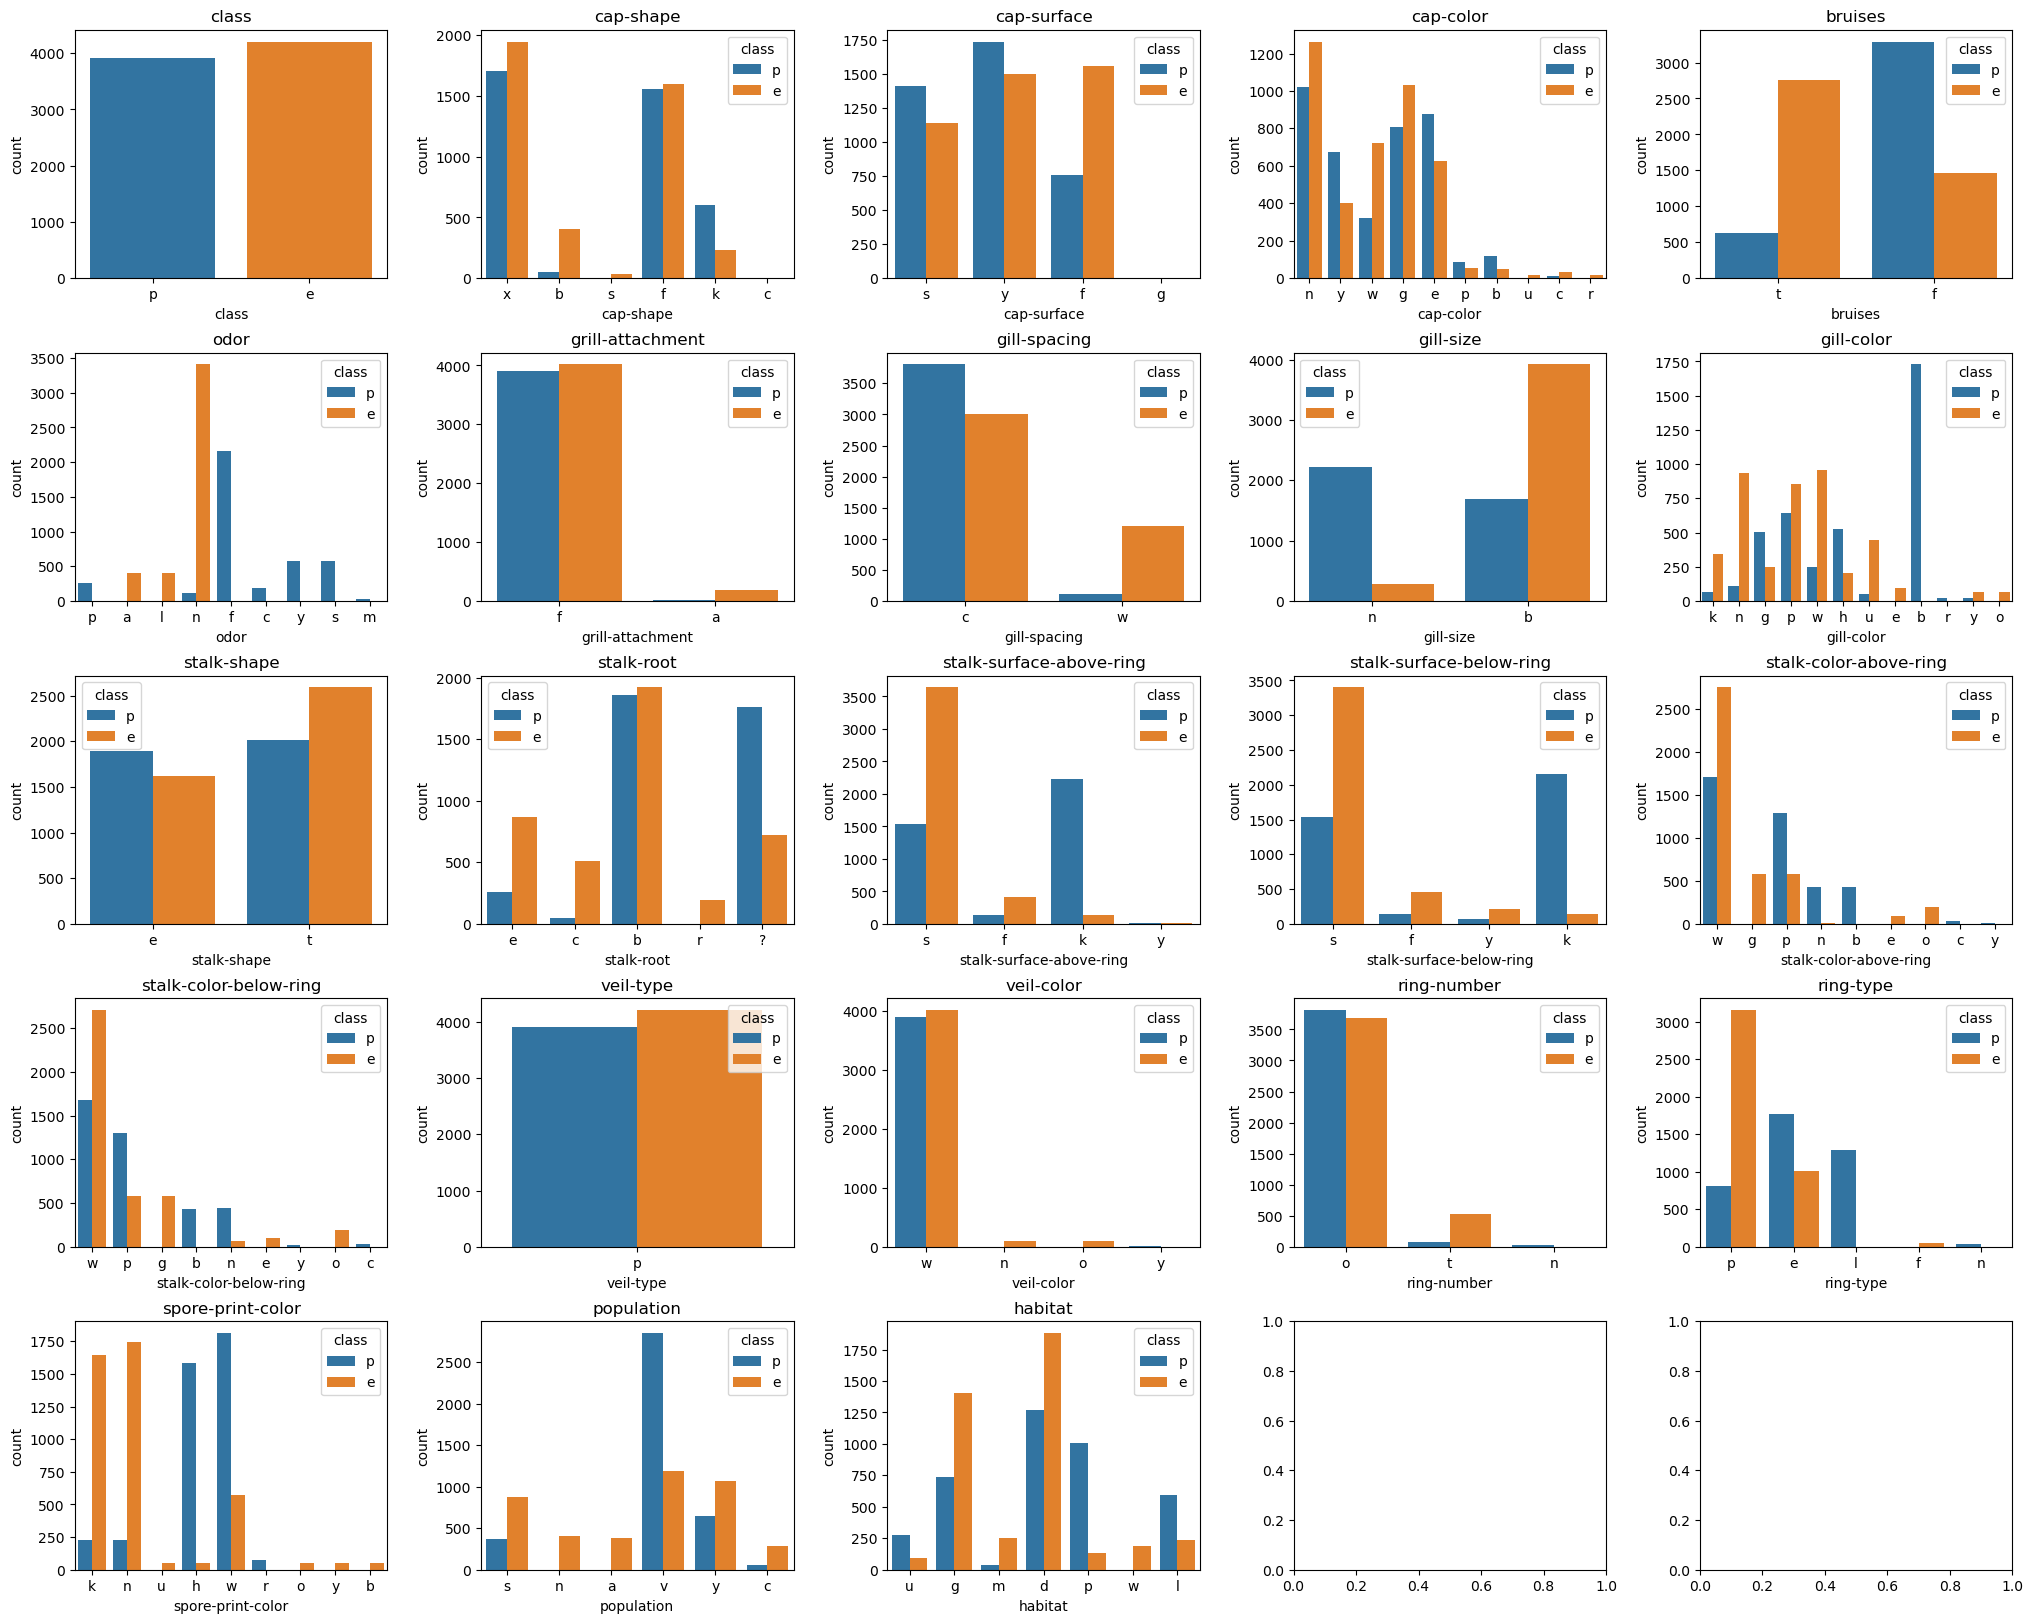

In [151]:
f, ax = plt.subplots(5, 5)
f.set_size_inches((25, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

num_rows = 4
num_cols = 5

# categorical_features = df1.select_dtypes(include=['object']).columns
for i, idx in enumerate(df1.columns[0:]):
    row = i // num_cols
    col = i % num_cols
    ax[row,col].set_title(idx)
    sns.countplot(x=idx, data=df1,hue='class', ax=ax[row,col])


In [25]:
from scipy.stats import chi2_contingency
for i, idx in enumerate(df1.columns[1:]):

    contingency_tab = pd.crosstab(df1[idx], df1['class'])
    chi2, p, _, _ = chi2_contingency(contingency_tab)
    print(idx+" Chi-squared statistic:", chi2)
    print(idx+" p-value:", p)
    print('=================')

cap-shape Chi-squared statistic: 489.91995361895573
cap-shape p-value: 1.196456568593578e-103
cap-surface Chi-squared statistic: 315.0428312080377
cap-surface p-value: 5.518427038649143e-68
cap-color Chi-squared statistic: 387.59776897722986
cap-color p-value: 6.055814598336574e-78
bruises Chi-squared statistic: 2041.4156474619554
bruises p-value: 0.0
odor Chi-squared statistic: 7659.726740165339
odor p-value: 0.0
grill-attachment Chi-squared statistic: 133.9861812865668
grill-attachment p-value: 5.501707411861009e-31
gill-spacing Chi-squared statistic: 984.1433330144739
gill-spacing p-value: 5.0229776137324786e-216
gill-shape Chi-squared statistic: 2366.8342569059605
gill-shape p-value: 0.0
gill-color Chi-squared statistic: 3765.7140862414803
gill-color p-value: 0.0
stalk-shape Chi-squared statistic: 84.14203826548719
stalk-shape p-value: 4.604746212155192e-20
stalk-root Chi-squared statistic: 1344.4405265497817
stalk-root p-value: 7.702047904943513e-290
stalk-surface-above-ring Chi-s

Target of remove
1. veil-type : only P
2. stalk-root : missing value(?)

---
[cap-color, cap-surface, bruises, odor, gill-attachment, gill-color, cap-size, stalk-shape, spore-print color, habitat]

### 결측치 컬럼 체크 (stalk-root)

In [185]:
counts = df1['stalk-root'].value_counts()
counts

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

### One-hot

In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

path = './data/mushroom/agaricus-lepiota.data'
colnames=['class','cap-shape','cap-surface','cap-color','bruises','odor','grill-attachment','gill-spacing','gill-shape','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat',] 
df1 = pd.read_csv(path, sep=",", names=colnames)
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,grill-attachment,gill-spacing,gill-shape,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [102]:
from sklearn.compose import ColumnTransformer

selected_columns = ['cap-shape',
                    'cap-surface',
                    'cap-color',
                    'grill-attachment',
                    'gill-spacing',
                    'stalk-shape',
                    'stalk-root',
                    'veil-color',
                    'ring-number',
                    'class']
train_df = df1[selected_columns]
train_df

# encoder = OneHotEncoder(sparse=False, drop='first')
encoder = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[('encoder', encoder, selected_columns[:-1])],
    remainder='passthrough'  # 다른 열은 변환하지 않고 그대로 유지
)

# 범주형 변수의 범주 학습
preprocessor.fit(df1)
encoded_data = preprocessor.fit_transform(train_df)

print(encoded_data.shape)
print(encoded_data)

(8124, 39)
[[0.0 0.0 0.0 ... 1.0 0.0 'p']
 [0.0 0.0 0.0 ... 1.0 0.0 'e']
 [1.0 0.0 0.0 ... 1.0 0.0 'e']
 ...
 [0.0 0.0 1.0 ... 1.0 0.0 'e']
 [0.0 0.0 0.0 ... 1.0 0.0 'p']
 [0.0 0.0 0.0 ... 1.0 0.0 'e']]


/Users/iamyoungjin/opt/anaconda3/envs/MLproject1/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/iamyoungjin/opt/anaconda3/envs/MLproject1/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [103]:
#encoded_df = pd.DataFrame(encoded_data, columns=['class_' + col for col in encoder.categories_[0]])
encoded_df = pd.DataFrame(encoded_data)
encoded_df = encoded_df.rename(columns={encoded_df.columns[-1]: 'class'})
encoded_df.shape


(8124, 39)

### Model

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
# data_encoded = pd.get_dummies(df1.drop("class", axis=1), drop_first=True)
# X = data_encoded
# y = df1["class"]

mapping = {'e': 1, 'p': 0}
encoded_df['class'] = encoded_df['class'].map(mapping)

print(encoded_df.shape)

X = encoded_df.drop(columns=['class'])
y = encoded_df['class']

kfold = KFold(n_splits=5)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# model = [LogisticRegression(), SVC(), DecisionTreeClassifier(), MLPClassifier()]

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    # acc = model.score(X_test, y_test)
    # print("score:", score)

(8124, 39)


In [105]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
print("mean acc:", mean_accuracy)
print("std acc:", std_accuracy)

mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
print("mean precision:", mean_precision)
print("std precision:", std_precision)

mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
print("mean recall:", mean_recall)
print("std recall:", std_recall)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
print("mean F1 score:", mean_f1)
print("std F1 score:", std_f1)

mean acc: 0.9646710875331564
std acc: 0.029830683278830594
mean precision: 0.9346153846153846
std precision: 0.0947677877568017
mean recall: 0.9444737723366673
std recall: 0.05365502828924571
mean F1 score: 0.9387034506361063
std F1 score: 0.07341609417824854


In [106]:
pd.options.display.max_rows = None